## Problem 1
### Part A Scatter Matrix

In [3]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [4]:
# Load data
file_path = 'DF1'
df1 = pd.read_csv(file_path)

In [3]:
# Print some different descriptions
#df1.describe()
#df1.shape
#print(df1)

#### Pandas Scatter

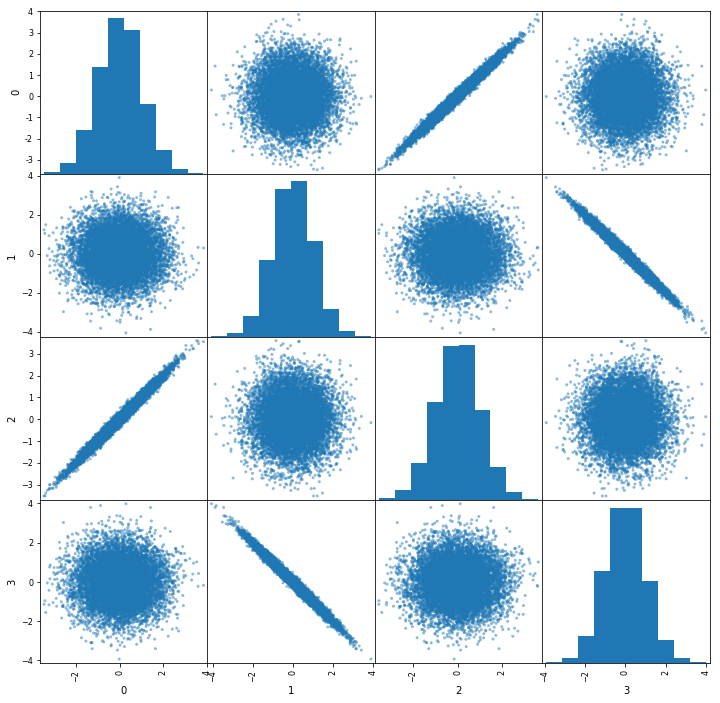

In [4]:
# Scatter matrix for the columns. Output is assigned to temporary 
# variable not to be used again due to jupyter notebook outputting
# each object otherwise.
_ = scatter_matrix(df1.iloc[:,1:], figsize=(12,12))

#### Seaborn Scatter

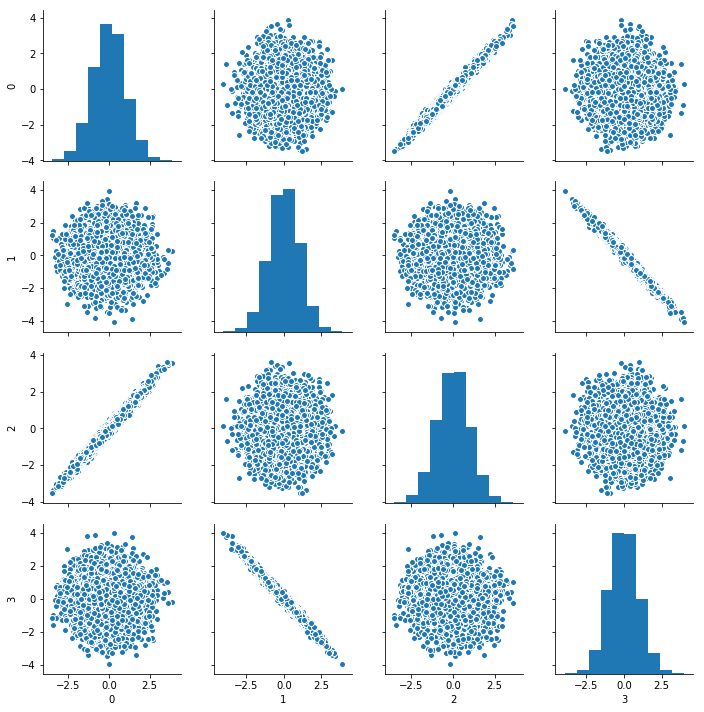

In [5]:
import seaborn as sns
_ = sns.pairplot(df1.iloc[:,1:])

### Part B Covariance Matrix
The covariance matrix for the columns is given by:


In [5]:
# Remove first column - "O Unnamed"
df_modified = df1.iloc[:,1:]
cov_matrix = df_modified.cov()
print(cov_matrix)

          0         1         2         3
0  1.001558 -0.004012  0.991624  0.004125
1 -0.004012  1.005378 -0.004099 -0.995457
2  0.991624 -0.004099  1.001589  0.004081
3  0.004125 -0.995457  0.004081  1.005168


#### Explanation
<p>
    The covariance matrix matches the scatter plots because:
    <ul>
      <li>Checking each entry of the matrix, we see the diagonal values are very close to 1. Since these are the correlation of a column with itself, they better be close to 1.</li> 
      <li>For the scatter plots (0,2),(2,0), we see strong positive correlation, which is indicated by the corresponding matrix entries being near 1.</li>
      <li>For the scatter plots (3,1),(1,3), we see a strong negative correlation, which is indicated by the corresponding matrix entries being near -1.</li>
      <li>The remaining plots all appear to have no linear correlation, and so the corresponding matrices entries have values very close to zero, as expected.</li>
    </ul>
</p>

### Part C Reverse the problem

We chose a covariance matrix s.t. the problem definition was met. We chose a correlation for $X_2$, $X_3$ of 0.94, and zeros for the entries corresponding to the uncorrelated variables. The diagonals (variances) were all ones. We plotted the covariance for the correlated entries as n grows larger.

In [6]:
mean_vector = [0,0,0]
cov_matrix = [[1,0,0],[0,1,0.94],[0,0.94,1]]
estimated = []
x = []
num_plots = 10000

for i in range(1,num_plots):
        Z = np.random.multivariate_normal(mean_vector,cov_matrix,size=10*i)
        df = pd.DataFrame(Z)
        cov = df.cov()
        estimated.append(cov.iloc[1,2])
        x.append(10*i)
        
actual = 0.94*np.ones(len(x))

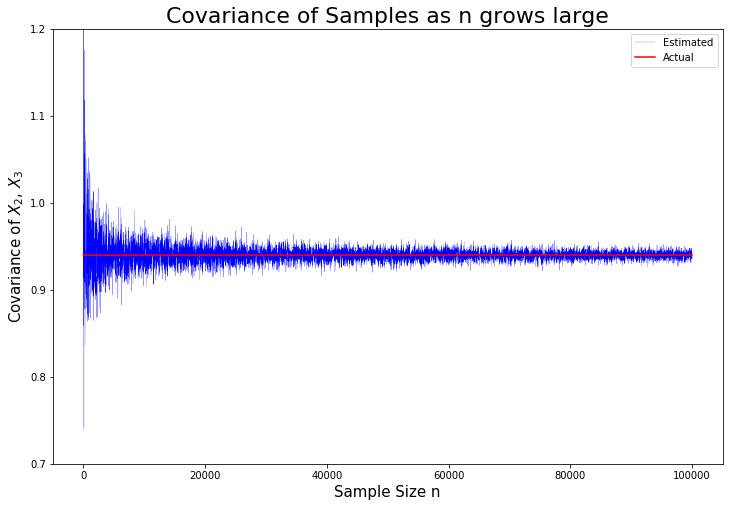

In [8]:
plt.figure(figsize=(12,8))
_ = plt.plot(x, estimated, 'b', linewidth=0.2, label='Estimated')
_ = plt.plot(x, actual, 'r', label='Actual')
_ = plt.title('Covariance of Samples as n grows large', FontSize=22)
_ = plt.xlabel('Sample Size n', FontSize=15)
_ = plt.ylabel('Covariance of $X_2$, $X_3$', FontSize=15)
plt.ylim([0.7, 1.2])
_ = plt.legend()